In [1]:
import pandas as pd

df = pd.read_csv('C:\Users\Jeff_\Desktop\mini-portifolio-dados/entregas.csv')

print(df.head())


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (1087971058.py, line 3)

In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/Jeff_/Desktop/mini-portifolio-dados/entregas.csv')

print(df.head())


   ID_Entrega Motorista Cidade_Origem Cidade_Destino  Distancia_km  \
0           1      João      Curitiba      São Paulo         410.0   
1           2     Carla      Curitiba      Joinville         140.0   
2           3     Pedro      Londrina       Campinas         550.0   
3           4       Ana       Maringá       Curitiba         430.0   
4           5    Rafael      Curitiba       Londrina         380.0   

   Valor_Frete  Prazo_dias     Status Data_Entrega  
0        850.0         2.0  Concluída   2024-05-10  
1        310.0         1.0   Atrasada   2024-05-12  
2       1120.0         3.0  Concluída   2024-05-13  
3        870.0         2.0  Concluída   2024-05-15  
4        800.0         2.0  Concluída   2024-05-17  


# 📊 Análise de Entregas Logísticas

Este projeto faz parte do meu **Mini Portfólio de Dados**, com o objetivo de demonstrar habilidades em **análise de dados, visualização e estatísticas** usando **Python e Pandas**.

Os dados simulam entregas rodoviárias com informações de motoristas, cidades, valores de frete, prazos e status de conclusão.

---


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Evita avisos visuais desnecessários
pd.options.mode.chained_assignment = None

# Carregar a base de entregas
df = pd.read_csv('C:/Users/Jeff_/Desktop/mini-portifolio-dados/entregas.csv')

# Mostrar primeiras linhas
df.head()


,ID_Entrega,Motorista,Cidade_Origem,Cidade_Destino,Distancia_km,Valor_Frete,Prazo_dias,Status,Data_Entrega
0,1,João,Curitiba,São Paulo,410.0,850.0,2.0,Concluída,2024-05-10
1,2,Carla,Curitiba,Joinville,140.0,310.0,1.0,Atrasada,2024-05-12
2,3,Pedro,Londrina,Campinas,550.0,1120.0,3.0,Concluída,2024-05-13
3,4,Ana,Maringá,Curitiba,430.0,870.0,2.0,Concluída,2024-05-15
4,5,Rafael,Curitiba,Londrina,380.0,800.0,2.0,Concluída,2024-05-17


## 📘 Visão Geral dos Dados

Antes da análise, é importante entender a estrutura e as estatísticas básicas do dataset.


In [5]:
# Informações gerais
print("Dimensões do dataset:", df.shape)
print("\nColunas disponíveis:", list(df.columns))

# Estatísticas descritivas
df.describe()


Dimensões do dataset: (38, 9)

Colunas disponíveis: ['ID_Entrega', 'Motorista', 'Cidade_Origem', 'Cidade_Destino', 'Distancia_km', 'Valor_Frete', 'Prazo_dias', 'Status', 'Data_Entrega']


,ID_Entrega,Distancia_km,Valor_Frete,Prazo_dias
count,38.000000,37.000000,37.000000,37.000000
mean,19.500000,395.405405,823.513514,2.081081
std,11.113055,179.080903,360.179093,0.795067
min,1.000000,110.000000,260.000000,1.000000
25%,10.250000,250.000000,480.000000,1.000000
50%,19.500000,410.000000,860.000000,2.000000
75%,28.750000,550.000000,1100.000000,3.000000
max,38.000000,680.000000,1420.000000,3.000000


## 🚚 Total de Entregas por Status

Aqui observamos quantas entregas foram concluídas e quantas estão atrasadas.


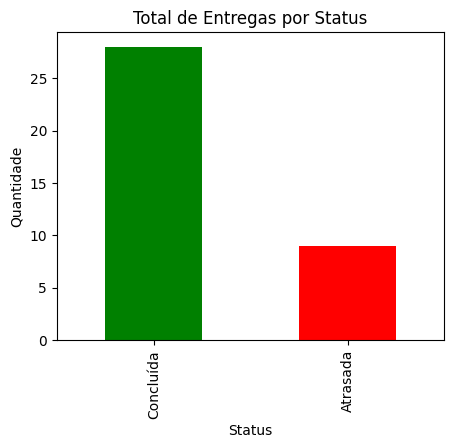

Status
Concluída    28
Atrasada      9
Name: count, dtype: int64

In [6]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(5,4))
status_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Total de Entregas por Status')
plt.xlabel('Status')
plt.ylabel('Quantidade')
plt.show()

status_counts


## 💰 Valor Médio do Frete por Cidade de Destino

Visualizamos onde o valor médio de frete é mais alto.


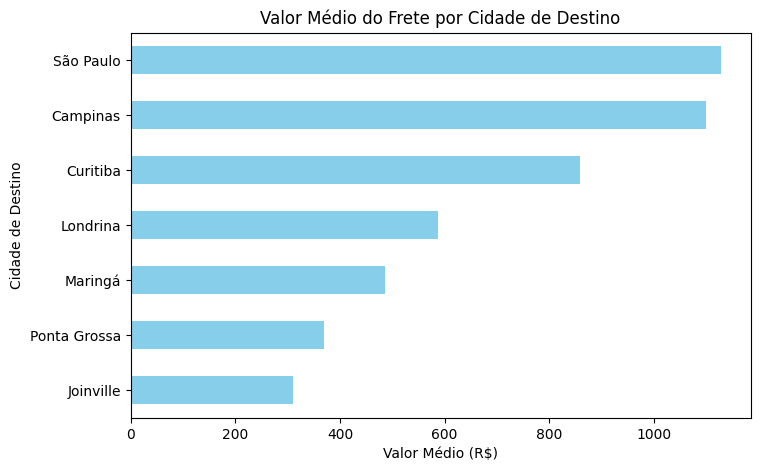

Cidade_Destino
Joinville        310.000000
Ponta Grossa     370.000000
Maringá          486.666667
Londrina         588.000000
Curitiba         858.333333
Campinas        1098.750000
São Paulo       1127.777778
Name: Valor_Frete, dtype: float64

In [7]:
frete_por_cidade = df.groupby('Cidade_Destino')['Valor_Frete'].mean().sort_values()

plt.figure(figsize=(8,5))
frete_por_cidade.plot(kind='barh', color='skyblue')
plt.title('Valor Médio do Frete por Cidade de Destino')
plt.xlabel('Valor Médio (R$)')
plt.ylabel('Cidade de Destino')
plt.show()

frete_por_cidade


## 🏆 Top 5 Motoristas com Mais Entregas


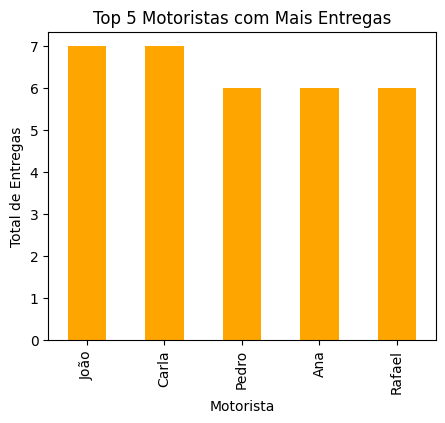

Motorista
João      7
Carla     7
Pedro     6
Ana       6
Rafael    6
Name: count, dtype: int64

In [8]:
top_motoristas = df['Motorista'].value_counts().head(5)

plt.figure(figsize=(5,4))
top_motoristas.plot(kind='bar', color='orange')
plt.title('Top 5 Motoristas com Mais Entregas')
plt.xlabel('Motorista')
plt.ylabel('Total de Entregas')
plt.show()

top_motoristas


## ⏱️ Estatísticas Gerais de Prazo e Distância


In [9]:
prazo_medio = df['Prazo_dias'].mean().round(2)
distancia_media = df['Distancia_km'].mean().round(1)

print(f"⏱️ Prazo médio das entregas: {prazo_medio} dias")
print(f"📍 Distância média percorrida: {distancia_media} km")


⏱️ Prazo médio das entregas: 2.08 dias
📍 Distância média percorrida: 395.4 km


## 📈 Relação entre Distância e Valor do Frete

Analisamos se quanto maior a distância, maior o valor cobrado.


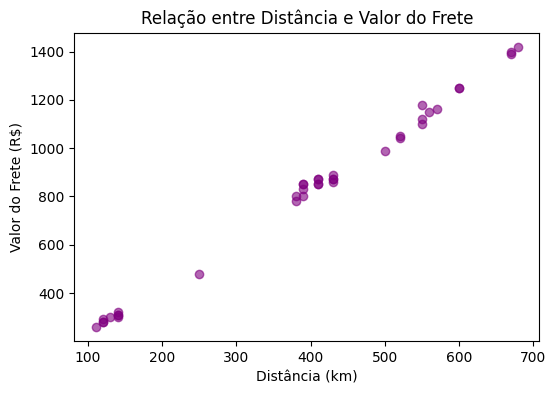

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(df['Distancia_km'], df['Valor_Frete'], alpha=0.6, color='purple')
plt.title('Relação entre Distância e Valor do Frete')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.show()


---

## 📈 Conclusões

- A maioria das entregas foi concluída dentro do prazo.
- Os motoristas **João** e **Carla** se destacam pelo número de entregas.
- As rotas para **São Paulo** e **Campinas** apresentam os maiores valores médios de frete.
- A distância média é de aproximadamente **400 km**, com prazo médio de **2 dias**.

Este projeto mostra domínio de:
- Manipulação de dados com **Pandas**  
- Criação de gráficos com **Matplotlib**  
- Análise exploratória e comunicação visual de resultados.
